### Clustering on the Description dataset 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from loader import Loader

In [5]:
data_loader = Loader(csv=['description-dataset-with-header.tsv'], separator='\t', nrows=200, chunksize=200).iterate()

In [6]:
for d in data_loader:
    km = MiniBatchKMeans(batch_size=200, init='k-means++').fit(d)

                id  portuens     piana      sole       via   bergolo  \
19443209  0.015732  0.028596  0.018229  0.002062  0.017545  0.024626   
20698481  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21929101  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24894425  0.000000  0.000000  0.000000  0.001616  0.000000  0.019294   
25773866  0.000000  0.000000  0.000000  0.002702  0.000000  0.000000   

            ultima  disponibilita   bilocal     piano    ...     \
19443209  0.019524       0.009711  0.001118  0.003957    ...      
20698481  0.000000       0.000000  0.002451  0.000000    ...      
21929101  0.000000       0.000000  0.001499  0.000000    ...      
24894425  0.000000       0.000000  0.000000  0.000000    ...      
25773866  0.000000       0.000000  0.002197  0.015554    ...      

          finestragrazi  predispozion  mestosa  wolkonskyin  ditribuisc  \
19443209            0.0           0.0      0.0          0.0         0.0   
20698481      

In [10]:
#drop annoucements 
info_data = d.drop("id", 1)

AttributeError: 'generator' object has no attribute 'drop'

In [7]:
info_data.head()

,price,locali,super ficie,bagni,piano
0,149000,3,65,2,0
1,190000,4,145,1,2
2,630000,5,200,2,4
3,470000,5,211,3,0
4,300000,3,92,1,0


In [8]:
#preprocess dataset
# info_data = info_data[info_data.piano != "T"]
# info_data = info_data[info_data.piano != "A"]
# info_data = info_data[info_data.piano != "R"]
# info_data = info_data[info_data.piano != "S"]
# info_data = info_data[info_data.piano != "11+"]
# info_data = info_data[info_data.locali != "3+"]
# info_data = info_data[info_data.locali != "5+"]
# info_data = info_data[info_data.bagni != "3+"]
info_data.head()

,price,locali,super ficie,bagni,piano
0,149000,3,65,2,0
1,190000,4,145,1,2
2,630000,5,200,2,4
3,470000,5,211,3,0
4,300000,3,92,1,0


In [9]:
len(info_data)

20013

In [10]:
#converting information dataset into matrix

In [11]:
info_mat = info_data.as_matrix(columns = None)

In [12]:
info_mat

array([[149000,      3,     65,      2,      0],
       [190000,      4,    145,      1,      2],
       [630000,      5,    200,      2,      4],
       ...,
       [155000,      4,    125,      1,      3],
       [228000,      3,     83,      1,      3],
       [142000,      3,     90,      1,      3]])

In [16]:
#clustering 
mms = MinMaxScaler()
mms.fit(info_mat)
data_transformed = mms.transform(info_mat)
data_transformed

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[2.29229231e-04, 5.00000000e-01, 2.32728119e-04, 5.00000000e-01,
        7.69230769e-02],
       [2.92306154e-04, 7.50000000e-01, 5.23638268e-04, 0.00000000e+00,
        2.30769231e-01],
       [9.69229232e-04, 1.00000000e+00, 7.23638995e-04, 5.00000000e-01,
        3.84615385e-01],
       ...,
       [2.38460000e-04, 7.50000000e-01, 4.50910731e-04, 0.00000000e+00,
        3.07692308e-01],
       [3.50767693e-04, 5.00000000e-01, 2.98182902e-04, 0.00000000e+00,
        3.07692308e-01],
       [2.18460000e-04, 5.00000000e-01, 3.23637541e-04, 0.00000000e+00,
        3.07692308e-01]])

In [23]:
Sum_of_squared_distances = []
K = range(2,12)
for k in K:
    km = MiniBatchKMeans(n_clusters=k, batch_size=200)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    label = km.labels_
    sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.47487920943642115
For n_clusters=3, The Silhouette Coefficient is 0.5136579421927815
For n_clusters=4, The Silhouette Coefficient is 0.5102460586130626
For n_clusters=5, The Silhouette Coefficient is 0.48446957377144473
For n_clusters=6, The Silhouette Coefficient is 0.5032843504330616
For n_clusters=7, The Silhouette Coefficient is 0.5090314477346991
For n_clusters=8, The Silhouette Coefficient is 0.5016294071356179
For n_clusters=9, The Silhouette Coefficient is 0.4617532891431688
For n_clusters=10, The Silhouette Coefficient is 0.49900702486254944
For n_clusters=11, The Silhouette Coefficient is 0.5219318121152503


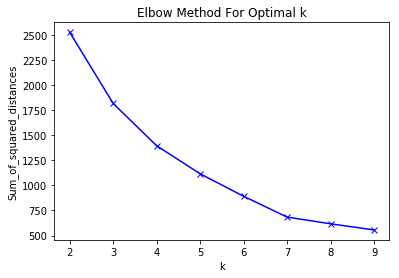

In [20]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(2,12)
for k in K:
    km = MiniBatchKMeans(n_clusters=k, batch_size=200)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    label = km.labels_
    sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))